# CS271-HW6-Ch5-Q10

## Plot input data malwareBenignScores.txt

Text(0, 0.5, 'OGS Score')

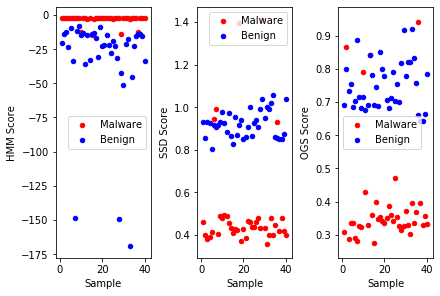

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("malwareBenignScores.txt.reformat", sep='\s+', header=0)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True)
df.plot(kind='scatter', x='Sample', y='HMM_M', s=20, c='r', ax=ax1, label='Malware')
df.plot(kind='scatter', x='Sample', y='HMM_B', s=20, c='b', ax=ax1, label='Benign')
ax1.set_ylabel('HMM Score')
#
df.plot(kind='scatter', x='Sample', y='SSD_M', s=20, c='r', ax=ax2, label='Malware')
df.plot(kind='scatter', x='Sample', y='SSD_B', s=20, c='b', ax=ax2, label='Benign')
ax2.set_ylabel('SSD Score')
#
df.plot(kind='scatter', x='Sample', y='OGS_M', s=20, c='r', ax=ax3, label='Malware')
df.plot(kind='scatter', x='Sample', y='OGS_B', s=20, c='b', ax=ax3, label='Benign')
ax3.set_ylabel('OGS Score')


## Prepare Train Set (maling = +1; benign = -1) and Test Set

In [2]:
from sklearn.svm import SVC
import numpy as np
# Train Set Prep
# Training Column Vectors
trX1=df[['HMM_M', 'SSD_M', 'OGS_M']].to_numpy()
trX2=df[['HMM_B', 'SSD_B', 'OGS_B']].to_numpy()
trX=np.concatenate((trX1[:20], trX2[:20]), axis=0)
# Corresponding label z (maline=+1; benigh=-1)
trZ=[1]*20+[-1]*20
# Test Set Prep 
testX=np.concatenate((trX1[20:], trX2[20:]), axis=0)


## Training and Scoring for Accuracy 

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# C : float, optional (default=1.0); Penalty parameter C of the error term.
# degree = p : int; Degree of the polynomial kernel function (‘poly’). 
#
# Ch5-Q10a) C=1, p=2
Ch5Q10a = SVC(gamma='auto', C=1.0, kernel='poly', degree=2)
Ch5Q10a.fit(trX, trZ) 
pred_a=Ch5Q10a.predict(testX)
acc_a=Ch5Q10a.score(testX, trZ)
print("\nCh5-Q10a) C=1; p=2 => Accuracy=%.3f" % acc_a)
print(Ch5Q10a)
#
# Ch5-Q10b) C=3, p=2
Ch5Q10b = SVC(gamma='auto', C=3.0, kernel='poly', degree=2)
Ch5Q10b.fit(trX, trZ) 
pred_b=Ch5Q10b.predict(testX)
acc_b=Ch5Q10b.score(testX, trZ)
print("\nCh5-Q10b) C=3; p=2 => Accuracy=%.3f" % acc_b)
print(Ch5Q10b)
#
# Ch5-Q10c) C=1, p=4
Ch5Q10c = SVC(gamma='auto', C=1.0, kernel='poly', degree=4)
Ch5Q10c.fit(trX, trZ) 
pred_c=Ch5Q10c.predict(testX)
acc_c=Ch5Q10c.score(testX, trZ)
print("\nCh5-Q10c) C=1; p=4 => Accuracy=%.3f" % acc_c)
print(Ch5Q10c)
#
# Ch5-Q10d) C=3, p=4
Ch5Q10d = SVC(gamma='auto', C=3.0, kernel='poly', degree=4)
Ch5Q10d.fit(trX, trZ) 
pred_d=Ch5Q10d.predict(testX)
acc_d=Ch5Q10d.score(testX, trZ)
print("\nCh5-Q10d) C=3; p=4 => Accuracy=%.3f" % acc_d)
print(Ch5Q10d)


Ch5-Q10a) C=1; p=2 => Accuracy=0.975
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Ch5-Q10b) C=3; p=2 => Accuracy=0.975
SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Ch5-Q10c) C=1; p=4 => Accuracy=0.925
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Ch5-Q10d) C=3; p=4 => Accuracy=0.925
SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
    max_iter=-1, prob

## SVM Classification Result

Text(0, -0.5, 'accuracy=0.925')

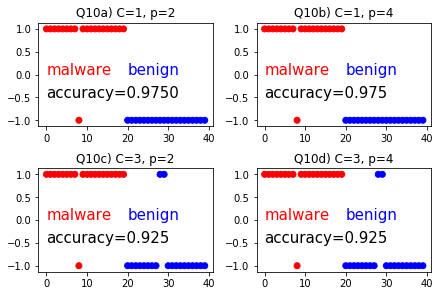

In [4]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
col=['red' if i > 0 else 'blue' for i in trZ]
x=[i for i in range(len(pred_a))]
    
y=pred_a 
axs[0, 0].scatter(x, y, color=col); axs[0, 0].set_title('Q10a) C=1, p=2')
axs[0, 0].text(0, 0, 'malware', {'color': 'r', 'fontsize': 15})
axs[0, 0].text(20, 0, 'benign', {'color': 'b', 'fontsize': 15})
axs[0, 0].text(0, -0.5, 'accuracy=%.4f' % acc_a, {'color': 'black', 'fontsize': 15})

y=pred_b 
axs[0, 1].scatter(x, y, color=col); axs[0, 1].set_title('Q10b) C=1, p=4')
axs[0, 1].text(0, 0, 'malware', {'color': 'r', 'fontsize': 15})
axs[0, 1].text(20, 0, 'benign', {'color': 'b', 'fontsize': 15})
axs[0, 1].text(0, -0.5, 'accuracy=%.3f' % acc_b, {'color': 'black', 'fontsize': 15})

y=pred_c 
axs[1, 0].scatter(x, y, color=col); axs[1, 0].set_title('Q10c) C=3, p=2')
axs[1, 0].text(0, 0, 'malware', {'color': 'r', 'fontsize': 15})
axs[1, 0].text(20, 0, 'benign', {'color': 'b', 'fontsize': 15})
axs[1, 0].text(0, -0.5, 'accuracy=%.3f' % acc_c, {'color': 'black', 'fontsize': 15})

y=pred_d
axs[1, 1].scatter(x, y, color=col); axs[1, 1].set_title('Q10d) C=3, p=4')
axs[1, 1].text(0, 0, 'malware', {'color': 'r', 'fontsize': 15})
axs[1, 1].text(20, 0, 'benign', {'color': 'b', 'fontsize': 15})
axs[1, 1].text(0, -0.5, 'accuracy=%.3f' % acc_d, {'color': 'black', 'fontsize': 15})
